<a href="https://colab.research.google.com/github/mgarbanzo/GOESR_Fundamentos/blob/main/GOES_R_FUNDAMENTOS_L2_Viento_Derivado_de_Movimiento_(DMW).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

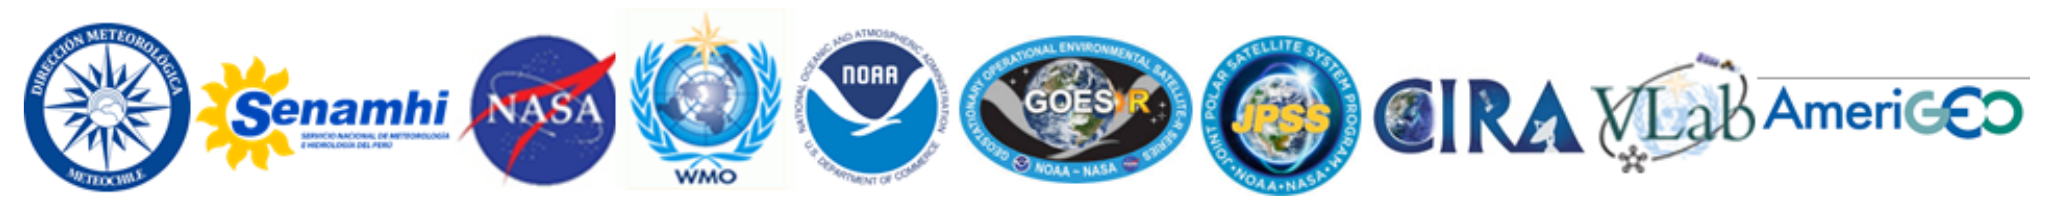

# Práctica de Python en la nube para generar el producto del GLM de GOES 16

##Taller‌ ‌Virtual‌ ‌sobre‌ ‌Aplicaciones‌ ‌Satelitales‌ ‌OMM‌ ‌AR-III‌

La **meta de aprendizaje** para este cuaderno es comprender como se leen,extraen y grafican los datos de un archivo generado por el instrumento SUVI del satélite GOES-16.

Nivel Avanzado

In [3]:
import pylab as plt
import numpy as np
from netCDF4 import Dataset

# Descarga de datos

Los productos de viento derivado de movimiento se obtienen de los canales 2,7,8,9,10 y 14.

In [1]:
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-DMWF/2021/311/18/OR_ABI-L2-DMWF-M6C02_G16_s20213111800206_e20213111809514_c20213111826290.nc
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-DMWF/2021/311/18/OR_ABI-L2-DMWF-M6C07_G16_s20213111800206_e20213111809525_c20213111823372.nc
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-DMWF/2021/311/18/OR_ABI-L2-DMWF-M6C08_G16_s20213111800206_e20213111809514_c20213111823391.nc
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-DMWF/2021/311/18/OR_ABI-L2-DMWF-M6C09_G16_s20213111800206_e20213111809519_c20213111843285.nc
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-DMWF/2021/311/18/OR_ABI-L2-DMWF-M6C10_G16_s20213111800206_e20213111809525_c20213111843281.nc
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-DMWF/2021/311/18/OR_ABI-L2-DMWF-M6C14_G16_s20213111800206_e20213111809514_c20213111823477.nc

--2021-11-08 14:59:43--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-DMWF/2021/311/18/OR_ABI-L2-DMWF-M6C02_G16_s20213111800206_e20213111809514_c20213111826290.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.217.76.132
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.217.76.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103513119 (99M) [binary/octet-stream]
Saving to: ‘OR_ABI-L2-DMWF-M6C02_G16_s20213111800206_e20213111809514_c20213111826290.nc’

OR_ABI-L2-DMWF-M6C0 100%[===================>]  98.72M  40.0MB/s    in 2.5s    

2021-11-08 14:59:46 (40.0 MB/s) - ‘OR_ABI-L2-DMWF-M6C02_G16_s20213111800206_e20213111809514_c20213111826290.nc’ saved [103513119/103513119]

--2021-11-08 14:59:46--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-DMWF/2021/311/18/OR_ABI-L2-DMWF-M6C07_G16_s20213111800206_e20213111809525_c20213111823372.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.2

Se va a demostrar con los datos de Canal 2:

In [4]:
archivo = Dataset('/content/OR_ABI-L2-DMWF-M6C02_G16_s20213111800206_e20213111809514_c20213111826290.nc')

Extraemos la variable de presión para observar los niveles en los cuales se obtuvieron los datos:

In [8]:
archivo.variables['pressure']

<class 'netCDF4._netCDF4.Variable'>
float32 pressure(nMeasures)
    _FillValue: -999.0
    long_name: ABI L2+ Derived Motion Winds: wind vector's air pressure
    standard_name: air_pressure
    valid_range: [   0. 1100.]
    units: hPa
    coordinates: band_id band_wavelength time lat lon
    grid_mapping: goes_lat_lon_projection
    cell_methods: time: point area: median (interval: 0.5 km comment: geolocated/not missing pixels from tracked feature's dominant cluster)
unlimited dimensions: nMeasures
current shape = (2048686,)
filling on

In [9]:
P = archivo.variables['pressure'][:]

(array([2.8000e+01, 7.7300e+02, 1.0390e+03, 1.3170e+03, 1.5860e+03,
        3.5340e+03, 1.4579e+04, 5.2816e+04, 5.6777e+04, 4.2666e+04,
        3.3290e+04, 2.5392e+04, 2.1661e+04, 1.6931e+04, 1.4116e+04,
        1.2524e+04, 1.0360e+04, 9.2880e+03, 8.1450e+03, 7.0270e+03,
        6.2750e+03, 5.9990e+03, 6.2950e+03, 6.5350e+03, 6.1070e+03,
        5.8290e+03, 5.8270e+03, 5.2000e+03, 4.9390e+03, 4.4330e+03,
        3.8340e+03, 3.5470e+03, 3.1210e+03, 3.1020e+03, 2.9900e+03,
        2.8550e+03, 2.8170e+03, 2.9610e+03, 2.7480e+03, 2.9690e+03,
        2.9770e+03, 3.0080e+03, 3.2090e+03, 3.0820e+03, 3.0270e+03,
        3.1520e+03, 3.2220e+03, 3.2670e+03, 3.3830e+03, 3.5080e+03,
        3.6840e+03, 3.6830e+03, 4.1040e+03, 4.1830e+03, 3.8350e+03,
        3.9510e+03, 3.8510e+03, 3.8580e+03, 3.7600e+03, 3.8370e+03,
        3.9900e+03, 4.2020e+03, 4.5200e+03, 4.8030e+03, 5.1520e+03,
        1.4270e+03, 1.9320e+03, 2.7530e+03, 3.2700e+03, 3.9150e+03,
        4.7980e+03, 4.7960e+03, 6.0080e+03, 6.09

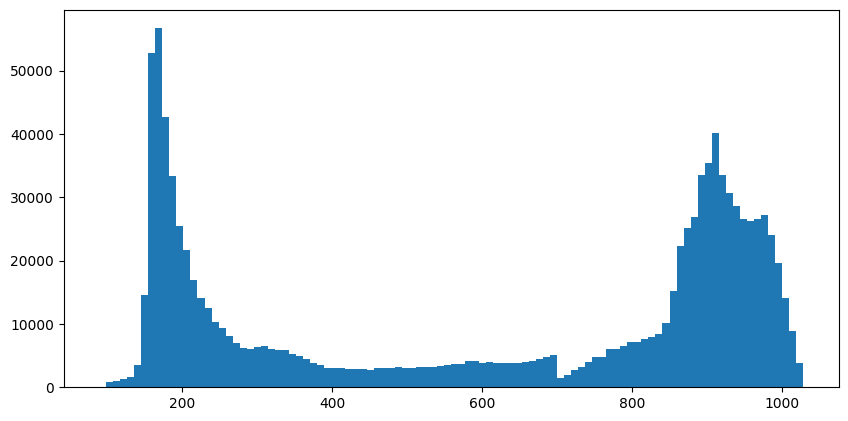

In [10]:
plt.figure(figsize=(10,5),dpi=100)
plt.hist(P,bins=100)

In [11]:
lat = archivo.variables['lat'][:]
lon = archivo.variables['lon'][:]
wsp = archivo.variables['wind_speed'][:]
wdr = archivo.variables['wind_direction'][:]

(array([3.2330e+03, 3.7400e+03, 4.2170e+03, 4.4890e+03, 4.9710e+03,
        5.4900e+03, 5.9970e+03, 6.9800e+03, 7.2820e+03, 7.9450e+03,
        8.9680e+03, 1.0322e+04, 1.1728e+04, 1.2124e+04, 1.3330e+04,
        1.3547e+04, 1.3227e+04, 1.2520e+04, 1.1789e+04, 1.0391e+04,
        9.0350e+03, 8.3230e+03, 7.7470e+03, 7.3380e+03, 6.4070e+03,
        5.7980e+03, 5.0060e+03, 4.0520e+03, 3.2210e+03, 2.5210e+03,
        2.2000e+03, 1.9860e+03, 1.6950e+03, 1.6300e+03, 1.4680e+03,
        1.2890e+03, 1.1060e+03, 1.0560e+03, 9.3400e+02, 8.2900e+02,
        7.3500e+02, 6.8100e+02, 5.7600e+02, 5.0400e+02, 4.6500e+02,
        4.3500e+02, 4.0100e+02, 4.0200e+02, 3.9100e+02, 3.3500e+02,
        3.1200e+02, 2.9600e+02, 2.6500e+02, 2.3800e+02, 2.3400e+02,
        2.1800e+02, 2.1300e+02, 1.9500e+02, 1.9200e+02, 1.9900e+02,
        2.0200e+02, 1.9900e+02, 1.7000e+02, 1.6500e+02, 1.8700e+02,
        1.6800e+02, 1.5500e+02, 1.3900e+02, 1.6100e+02, 1.4500e+02,
        1.5200e+02, 1.4400e+02, 1.1000e+02, 1.14

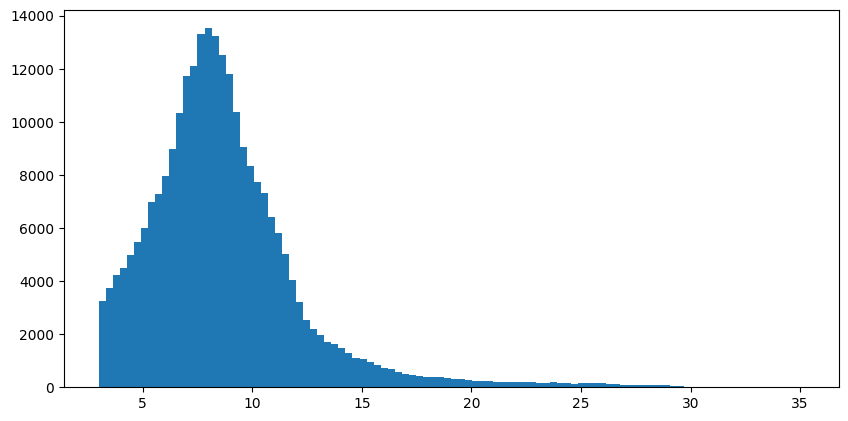

In [12]:
plt.figure(figsize=(10,5),dpi=100)
plt.hist(wsp,bins=100)

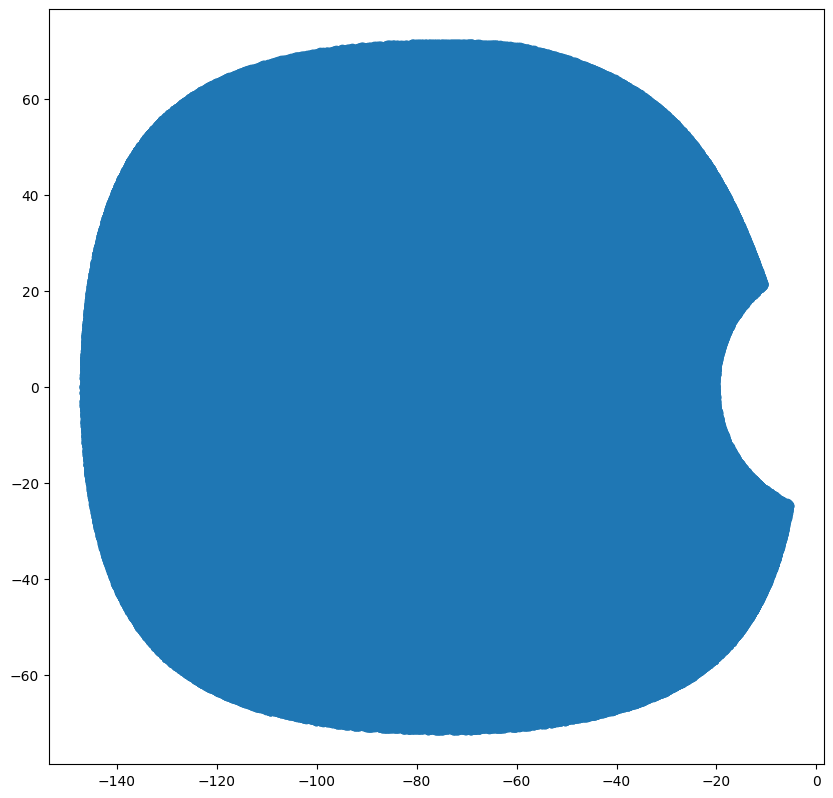

In [18]:
plt.figure(figsize=(10,10),dpi=100)
plt.scatter(lon, lat, marker='o')

In [19]:
u = wsp * np.cos(np.deg2rad(wdr+180))
v = wsp * np.sin(np.deg2rad(wdr+180))

In [20]:
Ilow = wsp < 6
Imed = np.multiply(wsp>=6,wsp<12)
Ihig = wsp >= 12

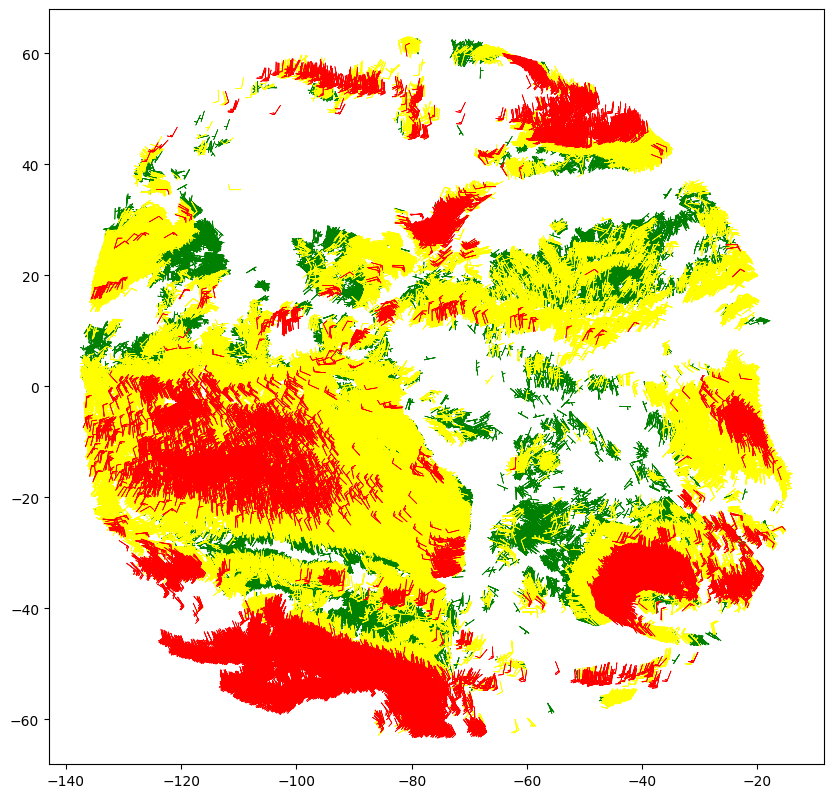

In [21]:
plt.figure(figsize=(10,10),dpi=100)

plt.barbs(lon[Ilow],lat[Ilow], u[Ilow], v[Ilow], length=4, pivot='middle', barbcolor='green',
             sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
             linewidth=0.5)

plt.barbs(lon[Imed],lat[Imed], u[Imed], v[Imed], length=4, pivot='middle', barbcolor='yellow',
             sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
             linewidth=0.5)

plt.barbs(lon[Ihig],lat[Ihig], u[Ihig], v[Ihig], length=4, pivot='middle', barbcolor='red',
             linewidth=0.5)